In [175]:
%pip install ../../mlrose/
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from ucimlrepo import fetch_ucirepo 
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import validation_curve
from sklearn.metrics import f1_score

Processing /Users/VivianNTran/Documents/CS7641 - ML/Assignment 2/mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=103053 sha256=3dc773e5c6e0d550347f5b6f1fb7f829d456ac19a3bd48b6db11e4000e95a81e
  Stored in directory: /private/var/folders/rk/9q8_q_l50ls0c1pdxg38z9m80000gp/T/pip-ephem-wheel-cache-_we9f56d/wheels/6d/5b/da/7cf5d7915d22f9006694bfefef2b605b6ed6540017cd5e1e1a
Successfully built mlrose-hiive
  Attempting uninstall: mlrose-hiive
    Found existing installation: mlrose-hiive 2.2.4
    Uninstalling mlrose-hiive-2.2.4:
      Successfully uninstalled mlrose-hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
RANDOM_STATE=101
seeds = [1, 7, 9, 101, 127]

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = wq_df.data.features 
y = wq_df.data.targets 

# Change values to 0-1: 0 for benign and 1 for malignant
y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})

In [4]:
# Split into training and testing sets. Don't use test set until the very end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, stratify = y)

### Pre-Processing

In [5]:
# Standardize training and test set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Apply SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Improved Back Propagation

#### Prediction

In [176]:
# Neural Network - Back Propogation - Reimplemented with mlrose
avg_bp_time = []
avg_bp_test_f1 = []
avg_bp_train_f1 = []
avg_bp_fitness = []
avg_train_sizes = []
avg_train_scores = []
avg_validation_scores = []

for seed in seeds:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
                                     algorithm = 'gradient_descent', max_iters = 2000,
                                     bias = True, is_classifier = True, learning_rate = 0.001,
                                     early_stopping = True, max_attempts = 10,
    				 random_state = seed, curve = True)

    # Get time
    start_time = time.time()
    nn_model1.fit(X_train, y_train)
    end_time = time.time()
    bp_time = end_time - start_time
    avg_bp_time.append(bp_time)

    # Predict labels for train set and assess f1
    y_train_pred = nn_model1.predict(X_train)
    y_train_f1 = f1_score(y_train, y_train_pred)
    print('Training f1: ', y_train_f1)
    avg_bp_train_f1.append(y_train_f1)

    # Predict labels for test set and assess f1
    y_test_pred = nn_model1.predict(X_test)
    y_test_f1 = f1_score(y_test, y_test_pred)
    print('Test f1: ', y_test_f1)
    avg_bp_test_f1.append(y_test_f1)

    # Get fitness
    fitness_curve_bp = nn_model1.fitness_curve
    avg_bp_fitness.append(fitness_curve_bp)

    # Get learning curve
    # train_sizes, train_scores, validation_scores = learning_curve(
    # estimator = nn_model1,
    # X = X_train,
    # y = y_train, cv = 5,
    # scoring = 'f1_macro',
    # random_state=seed)

    # avg_train_sizes.append(train_sizes)
    # avg_train_scores.append(train_scores)
    # avg_validation_scores.append(validation_scores)

Training f1:  0.9964788732394366
Test f1:  0.9382716049382716
Training f1:  0.9964788732394366
Test f1:  0.926829268292683
Training f1:  0.9964788732394366
Test f1:  0.95
Training f1:  0.9964788732394366
Test f1:  0.9382716049382716
Training f1:  0.9964788732394366
Test f1:  0.926829268292683


In [177]:
# Run time
avg_bp_time = np.mean(avg_bp_time)
print('Avg Run Time: ', avg_bp_time)

# Training performance
avg_bp_train_f1 = np.mean(avg_bp_train_f1)
print('Avg Training Performance: ', avg_bp_train_f1)

# Testing performance
avg_bp_test_f1 = np.mean(avg_bp_test_f1)
print('Avg Test Performance: ', avg_bp_test_f1)

Avg Run Time:  10.067633676528931
Avg Training Performance:  0.9964788732394366
Avg Test Performance:  0.9360403492923817


In [35]:
# Hidden Layer = 100
# Avg Run Time:  8.956750774383545
# Avg Training Performance:  0.9968316047426917
# Avg Test Performance:  0.9317588329832429
# Hidden Layer = 75
# Avg Run Time:  10.77319793701172
# Avg Training Performance:  0.9964788732394366
# Avg Test Performance:  0.9360403492923817

#### Fitness Curve

In [178]:
print(avg_bp_fitness)

[array([-1.57521516, -7.95451193, -0.26636543, ..., -0.01783667,
       -0.01782863, -0.01782313]), array([-5.40179058, -4.44475719, -0.31086122, ..., -0.01990837,
       -0.01990095, -0.01988926]), array([-0.96750496, -2.6844856 , -5.56981122, ..., -0.01963251,
       -0.01962404, -0.01961423]), array([-2.06030297, -4.2354156 , -3.03559281, ..., -0.01581065,
       -0.01580679, -0.01579761]), array([-4.57272669, -5.14810898, -0.48746305, ..., -0.02169325,
       -0.02168949, -0.02167534])]


In [179]:
# Fitness Curve
avg_bp_fitness = np.mean(avg_bp_fitness, axis=0)
print('Avg Fitness Curve: ', avg_bp_fitness)

Avg Fitness Curve:  [-2.91550807 -4.89345586 -1.93401875 ... -0.01897629 -0.01896998
 -0.01895991]


In [180]:
# Make curve into a loss curve
avg_bp_fitness = avg_bp_fitness * -1

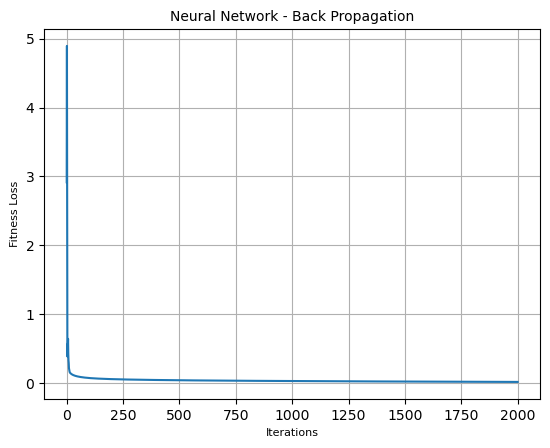

In [224]:
# Plotting fitness curve
iterations = [*range(0, len(avg_bp_fitness))]
plt.plot(iterations, avg_bp_fitness)
plt.title('Neural Network - Back Propagation', fontsize=10)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Fitness Loss', fontsize=8)
plt.grid()
plt.savefig('plots/nn_bp_fitness_iterations.png')
plt.show()

#### Learning Curve

In [39]:
# avg_train_sizes = np.mean(avg_train_sizes, axis=0)
# avg_train_scores = np.mean(np.mean(avg_train_scores, axis=0), axis=1)
# avg_validation_scores = np.mean(np.mean(avg_validation_scores, axis=0), axis=1)

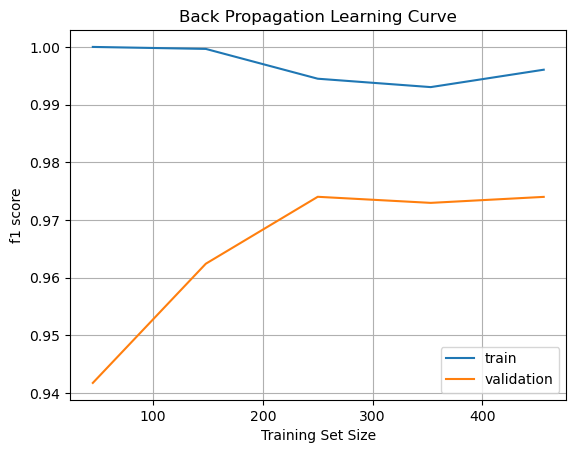

In [40]:
# plt.plot(avg_train_sizes, avg_train_scores, label="train")
# plt.plot(avg_train_sizes, avg_validation_scores, label="validation")

# plt.title("Back Propagation Learning Curve")
# plt.xlabel("Training Set Size")
# plt.ylabel("f1 score")
# plt.legend(loc="best")
# plt.grid()
# plt.savefig('plots/nn_bp_learning_curve.png')
# plt.show()

### Random Hill Climbing

#### Prediction

In [199]:
# Neural Network - Random Hill Climbing
avg_rhc_time = []
avg_rhc_test_f1 = []
avg_rhc_train_f1 = []
avg_rhc_fitness = []
avg_train_sizes = []
avg_train_scores = []
avg_validation_scores = []

for seed in seeds:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
                                     algorithm = 'random_hill_climb', max_iters = 2000,
                                     bias = True, is_classifier = True, learning_rate = 0.001,
                                     early_stopping = True, max_attempts = 10,
    				 random_state = seed, curve = True, restarts = 100)

    # Get time
    start_time = time.time()
    nn_model1.fit(X_train, y_train)
    end_time = time.time()
    rhc_time = end_time - start_time
    avg_rhc_time.append(rhc_time)

    # Predict labels for train set and assess f1
    y_train_pred = nn_model1.predict(X_train)
    y_train_f1 = f1_score(y_train, y_train_pred)
    print('Training f1: ', y_train_f1)
    avg_rhc_train_f1.append(y_train_f1)

    # Predict labels for test set and assess f1
    y_test_pred = nn_model1.predict(X_test)
    y_test_f1 = f1_score(y_test, y_test_pred)
    print('Test f1: ', y_test_f1)
    avg_rhc_test_f1.append(y_test_f1)

    # Get fitness
    fitness_curve_rhc = nn_model1.fitness_curve
    avg_rhc_fitness.append(fitness_curve_rhc)

    # Get learning curve
    # train_sizes, train_scores, validation_scores = learning_curve(
    # estimator = nn_model1,
    # X = X_train,
    # y = y_train, cv = 5,
    # scoring = 'f1_macro',
    # random_state=seed,
    # n_jobs = -1)

    # avg_train_sizes.append(train_sizes)
    # avg_train_scores.append(train_scores)
    # avg_validation_scores.append(validation_scores)

Training f1:  0.9163763066202091
Test f1:  0.8387096774193549
Training f1:  0.9042904290429042
Test f1:  0.8541666666666666
Training f1:  0.87279843444227
Test f1:  0.9090909090909091
Training f1:  0.7796101949025487
Test f1:  0.6371681415929203
Training f1:  0.8330464716006885
Test f1:  0.7526881720430108


In [200]:
# Run time
avg_rhc_time = np.mean(avg_rhc_time)
print('Avg Run Time: ', avg_rhc_time)

# Training performance
avg_rhc_train_f1 = np.mean(avg_rhc_train_f1)
print('Avg Training Performance: ', avg_rhc_train_f1)

# Testing performance
avg_rhc_test_f1 = np.mean(avg_rhc_test_f1)
print('Avg Test Performance: ', avg_rhc_test_f1)

Avg Run Time:  712.7860950946808
Avg Training Performance:  0.8612243673217241
Avg Test Performance:  0.7983647133625723


In [ ]:
# Restarts = 0
# Avg Run Time:  1.7058753490447998
# Avg Training Performance:  0.26422309552599754
# Avg Test Performance:  0.21962621222107143
# Restarts = 50
# Avg Run Time:  84.4387830734253
# Avg Training Performance:  0.8175758236156131
# Avg Test Performance:  0.7471946148665414
# Restarts = 100
# Avg Run Time:  123.76219053268433
# Avg Training Performance:  0.8612243673217241
# Avg Test Performance:  0.7983647133625723
# Restarts = 500
# Restarts = 1000

#### Fitness Curve

In [201]:
for i in range(len(avg_rhc_fitness)):
    print(len(avg_rhc_fitness[i]))

631
1978
282
451
935


In [206]:
print(avg_rhc_fitness[0][:,0])

[0.744679   0.744679   0.744679   0.744679   0.744679   0.74466791
 0.74466655 0.74466596 0.74466596 0.74465989 0.74461393 0.74461393
 0.74459177 0.74459177 0.7445917  0.7445917  0.74455893 0.74455558
 0.74455534 0.74455534 0.74455453 0.74453677 0.74453649 0.74453649
 0.74452023 0.74452023 0.74450173 0.74450173 0.74450173 0.74450173
 0.74450173 0.74450173 0.74450173 0.74450173 0.74450173 0.74450073
 0.74450073 0.74450073 0.74450073 0.74450073 0.74450073 0.74450073
 0.74450073 0.74450072 0.74450072 0.74450072 0.74450072 0.74450072
 0.74450072 0.74447207 0.74447207 0.74447207 0.74445495 0.74444404
 0.74444404 0.74444404 0.74444404 0.744439   0.744439   0.74443878
 0.74443815 0.74443815 0.74443815 0.74440892 0.74440892 0.74440709
 0.74440709 0.74440709 0.74439433 0.74437537 0.74437537 0.74437537
 0.74437537 0.74427638 0.74427638 0.74427638 0.74426626 0.74426626
 0.74426626 0.74426144 0.74426144 0.74425727 0.74425692 0.74425692
 0.74425692 0.74425692 0.74424898 0.74424898 0.74424898 0.7442

In [207]:
# Fitness Curve
# avg_rhc_fitness1 = np.mean(avg_rhc_fitness[0], axis=1)
print('Avg Fitness Curve: ', avg_rhc_fitness[0][:,0])

Avg Fitness Curve:  [0.744679   0.744679   0.744679   0.744679   0.744679   0.74466791
 0.74466655 0.74466596 0.74466596 0.74465989 0.74461393 0.74461393
 0.74459177 0.74459177 0.7445917  0.7445917  0.74455893 0.74455558
 0.74455534 0.74455534 0.74455453 0.74453677 0.74453649 0.74453649
 0.74452023 0.74452023 0.74450173 0.74450173 0.74450173 0.74450173
 0.74450173 0.74450173 0.74450173 0.74450173 0.74450173 0.74450073
 0.74450073 0.74450073 0.74450073 0.74450073 0.74450073 0.74450073
 0.74450073 0.74450072 0.74450072 0.74450072 0.74450072 0.74450072
 0.74450072 0.74447207 0.74447207 0.74447207 0.74445495 0.74444404
 0.74444404 0.74444404 0.74444404 0.744439   0.744439   0.74443878
 0.74443815 0.74443815 0.74443815 0.74440892 0.74440892 0.74440709
 0.74440709 0.74440709 0.74439433 0.74437537 0.74437537 0.74437537
 0.74437537 0.74427638 0.74427638 0.74427638 0.74426626 0.74426626
 0.74426626 0.74426144 0.74426144 0.74425727 0.74425692 0.74425692
 0.74425692 0.74425692 0.74424898 0.744248

In [ ]:
# # Make curve into a loss curve
# avg_bp_fitness = avg_bp_fitness * -1

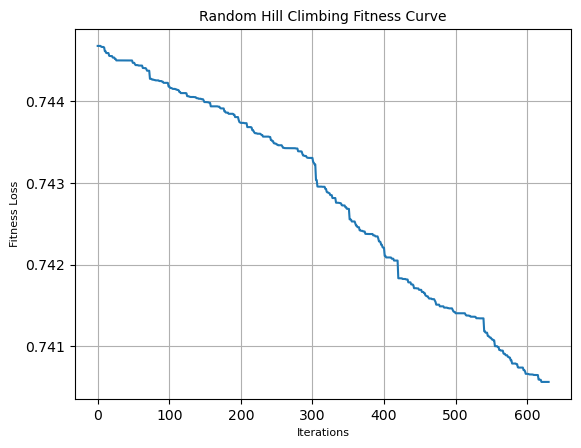

In [223]:
# Plotting fitness curve
iterations = [*range(0, len(avg_rhc_fitness[0][:,0]))]
plt.plot(iterations, avg_rhc_fitness[0][:,0])
plt.title('Random Hill Climbing Fitness Curve', fontsize=10)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Fitness Loss', fontsize=8)
plt.grid()
plt.savefig('plots/nn_rhc_fitness_iterations.png')
plt.show()

#### Learning Curve

In [72]:
# avg_train_sizes = np.mean(avg_train_sizes, axis=0)
# avg_train_scores = np.mean(np.mean(avg_train_scores, axis=0), axis=1)
# avg_validation_scores = np.mean(np.mean(avg_validation_scores, axis=0), axis=1)

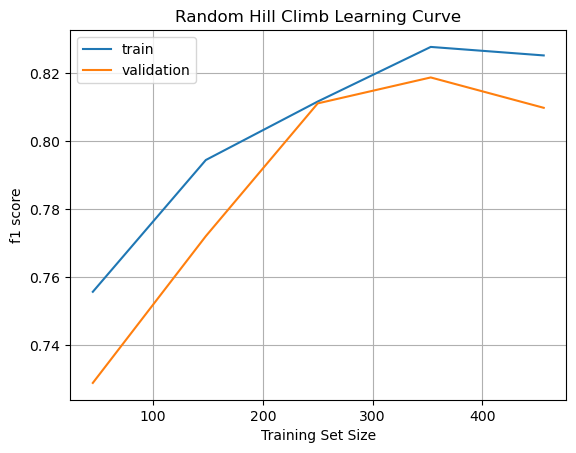

In [73]:
# plt.plot(avg_train_sizes, avg_train_scores, label="train")
# plt.plot(avg_train_sizes, avg_validation_scores, label="validation")

# plt.title("Random Hill Climb Learning Curve")
# plt.xlabel("Training Set Size")
# plt.ylabel("f1 score")
# plt.legend(loc="best")
# plt.grid()
# plt.savefig('plots/nn_rhc_learning_curve.png')
# plt.show()

#### Validation Curves

In [52]:
# parameter_range = [1, 10, 25, 50, 100, 500]
# val_avg_train_scores = []
# val_avg_test_scores = []

# nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
#                                  algorithm = 'random_hill_climb', max_iters = 2000,
#                                  bias = True, is_classifier = True, learning_rate = 0.001,
#                                  early_stopping = True, max_attempts = 10,
#                  random_state = seed, curve = True)

# train_score, test_score = validation_curve(nn_model1, X_train, y_train,
#                                            param_name="restarts",
#                                            param_range=parameter_range,
#                                            cv=5, scoring="f1_macro")

# val_avg_train_scores.append(train_score)
# val_avg_test_scores.append(test_score)

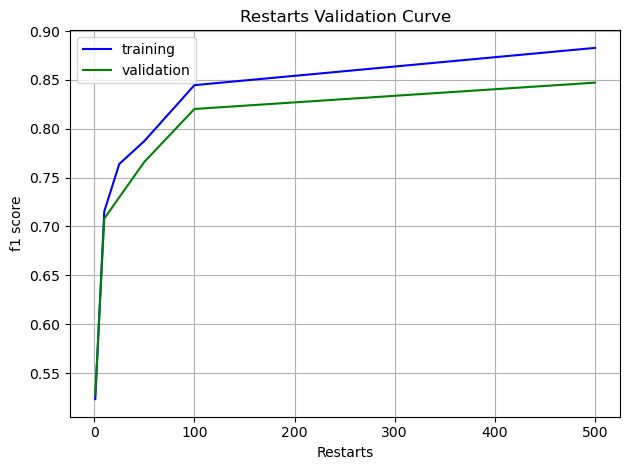

In [53]:
# # Calculating mean and standard deviation of training score
# mean_train_score = np.mean(train_score, axis=1)
# std_train_score = np.std(train_score, axis=1)
 
# # Calculating mean and standard deviation of testing score
# mean_test_score = np.mean(test_score, axis=1)
# std_test_score = np.std(test_score, axis=1)

# parameter_range = [1, 10, 25, 50, 100, 500]
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range, mean_train_score,
#          label="training", color='b')
# plt.plot(parameter_range, mean_test_score,
#          label="validation", color='g')
 
# # Creating the plot
# plt.title("Restarts Validation Curve")
# plt.xlabel("Restarts")
# plt.ylabel("f1 score")
# plt.tight_layout()
# plt.legend(loc='best')
# plt.grid()
# plt.savefig('plots/nn_rhc_restarts_validation_curve.png')
# plt.show()

### Simulated Annealing

#### Prediction

In [193]:
# Neural Network - Simulated Annealing
avg_sa_time = []
avg_sa_test_f1 = []
avg_sa_train_f1 = []
avg_sa_fitness = []
avg_train_sizes = []
avg_train_scores = []
avg_validation_scores = []

for seed in seeds:
    schedule = mlrose.GeomDecay()
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
                                     algorithm = 'simulated_annealing', max_iters = 2000,
                                     bias = True, is_classifier = True, learning_rate = 0.001,
                                     early_stopping = True, max_attempts = 10,
    				 random_state = seed, curve = True, schedule = schedule)

    # Get time
    start_time = time.time()
    nn_model1.fit(X_train, y_train)
    end_time = time.time()
    sa_time = end_time - start_time
    avg_sa_time.append(sa_time)

    # Predict labels for train set and assess f1
    y_train_pred = nn_model1.predict(X_train)
    y_train_f1 = f1_score(y_train, y_train_pred)
    print('Training f1: ', y_train_f1)
    avg_sa_train_f1.append(y_train_f1)

    # Predict labels for test set and assess f1
    y_test_pred = nn_model1.predict(X_test)
    y_test_f1 = f1_score(y_test, y_test_pred)
    print('Test f1: ', y_test_f1)
    avg_sa_test_f1.append(y_test_f1)

    # Get fitness
    fitness_curve_sa = nn_model1.fitness_curve
    avg_sa_fitness.append(fitness_curve_sa)

    # Get learning curve
    # train_sizes, train_scores, validation_scores = learning_curve(
    # estimator = nn_model1,
    # X = X_train,
    # y = y_train, cv = 5,
    # scoring = 'f1_macro',
    # random_state=seed,
    # n_jobs = -1)

    # avg_train_sizes.append(train_sizes)
    # avg_train_scores.append(train_scores)
    # avg_validation_scores.append(validation_scores)

Training f1:  0.020833333333333332
Test f1:  0.046511627906976744
Training f1:  0.0
Test f1:  0.0
Training f1:  0.6369119420989143
Test f1:  0.5131578947368421
Training f1:  0.6666666666666666
Test f1:  0.5384615384615384
Training f1:  0.0
Test f1:  0.0


In [194]:
# Run time
avg_sa_time = np.mean(avg_sa_time)
print('Avg Run Time: ', avg_sa_time)

# Training performance
avg_sa_train_f1 = np.mean(avg_sa_train_f1)
print('Avg Training Performance: ', avg_sa_train_f1)

# Testing performance
avg_sa_test_f1 = np.mean(avg_sa_test_f1)
print('Avg Test Performance: ', avg_sa_test_f1)

Avg Run Time:  6.032099390029908
Avg Training Performance:  0.2648823884197829
Avg Test Performance:  0.21962621222107143


In [ ]:
# Default
# Avg Run Time:  5.472656869888306
# Avg Training Performance:  0.2648823884197829
# Avg Test Performance:  0.21962621222107143

#### Fitness Curve

In [195]:
for i in range(len(avg_sa_fitness)):
    print(len(avg_sa_fitness[i]))

2000
2000
2000
2000
2000


In [196]:
print(np.mean(avg_sa_fitness, axis=0))

[[2.91553657e+00 3.00000000e+00]
 [2.91565375e+00 5.00000000e+00]
 [2.91567007e+00 7.00000000e+00]
 ...
 [2.91043538e+00 3.97480000e+03]
 [2.91043796e+00 3.97680000e+03]
 [2.91043355e+00 3.97880000e+03]]


In [197]:
# Fitness Curve
avg_sa_fitness = np.mean(avg_sa_fitness, axis=0)
print('Avg Fitness Curve: ', avg_sa_fitness[:,0])

Avg Fitness Curve:  [2.91553657 2.91565375 2.91567007 ... 2.91043538 2.91043796 2.91043355]


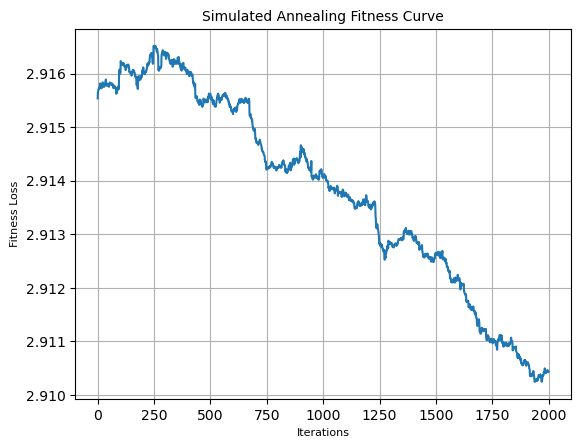

In [222]:
# Plotting fitness curve
iterations = [*range(0, len(avg_sa_fitness[:,0]))]
plt.plot(iterations, avg_sa_fitness[:,0])
plt.title('Simulated Annealing Fitness Curve', fontsize=10)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Fitness Loss', fontsize=8)
plt.grid()
plt.savefig('plots/nn_sa_fitness_iterations.png')
plt.show()

#### Learning Curve

In [130]:
avg_train_sizes = np.mean(avg_train_sizes, axis=0)
avg_train_scores = np.mean(np.mean(avg_train_scores, axis=0), axis=1)
avg_validation_scores = np.mean(np.mean(avg_validation_scores, axis=0), axis=1)

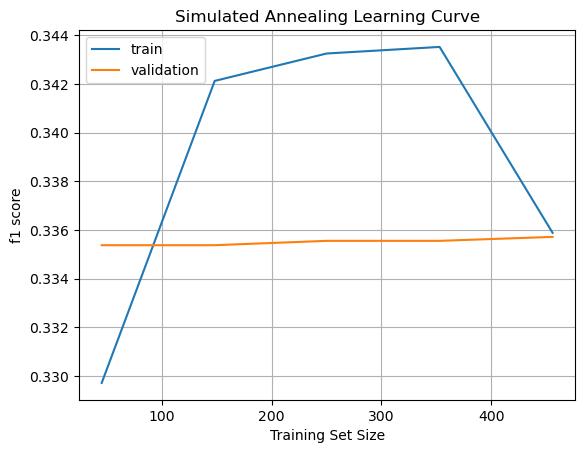

In [131]:
plt.plot(avg_train_sizes, avg_train_scores, label="train")
plt.plot(avg_train_sizes, avg_validation_scores, label="validation")

plt.title("Simulated Annealing Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('plots/nn_sa_learning_curve.png')
plt.show()

#### Validation Curve

In [137]:
parameter_range = [mlrose.GeomDecay(init_temp=1), mlrose.GeomDecay(init_temp=25), mlrose.GeomDecay(init_temp=50), mlrose.GeomDecay(init_temp=100)]
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
                                 algorithm = 'simulated_annealing', max_iters = 2000,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 10,
				 random_state = seed, curve = True)

init_temp_train_score, init_temp_test_score = validation_curve(nn_model1, X_train, y_train,
                                           param_name="schedule",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro", n_jobs=-1)

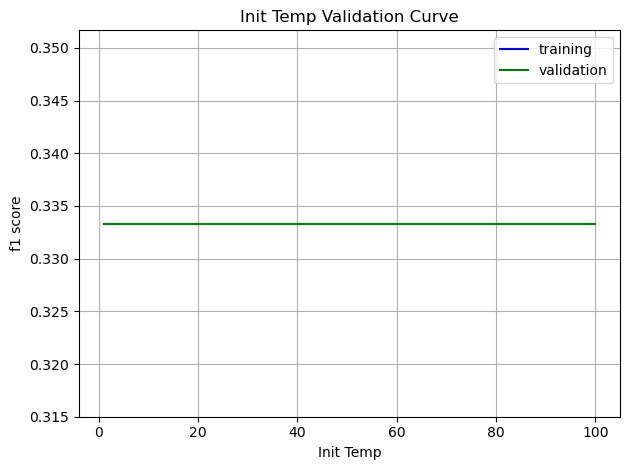

In [138]:
# Calculating mean and standard deviation of training score
mean_init_temp_train_score = np.mean(init_temp_train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_init_temp_test_score = np.mean(init_temp_test_score, axis=1)

parameter_range = [1, 25, 50, 100]
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_init_temp_train_score,
         label="training", color='b')
plt.plot(parameter_range, mean_init_temp_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("Init Temp Validation Curve")
plt.xlabel("Init Temp")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('plots/nn_sa_init_temp_validation_curve.png')
plt.show()

In [124]:
parameter_range = [mlrose.GeomDecay(decay=.1), mlrose.GeomDecay(decay=.25), mlrose.GeomDecay(decay=.5), mlrose.GeomDecay(decay=.99)]
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
                                 algorithm = 'simulated_annealing', max_iters = 2000,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, max_attempts = 10,
				 random_state = seed, curve = True)
decay_train_score, decay_test_score = validation_curve(nn_model1, X_train, y_train,
                                           param_name="schedule",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro", n_jobs=-1)

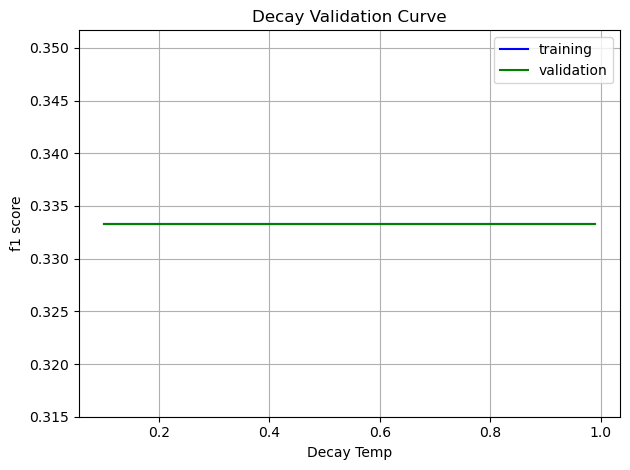

In [125]:
# Calculating mean and standard deviation of training score
mean_decay_train_score = np.mean(decay_train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_decay_test_score = np.mean(decay_test_score, axis=1)

parameter_range = [.1, .25, .50, .99]
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_decay_train_score,
         label="training", color='b')
plt.plot(parameter_range, mean_decay_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("Decay Validation Curve")
plt.xlabel("Decay Temp")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('plots/nn_sa_decay_validation_curve.png')
plt.show()

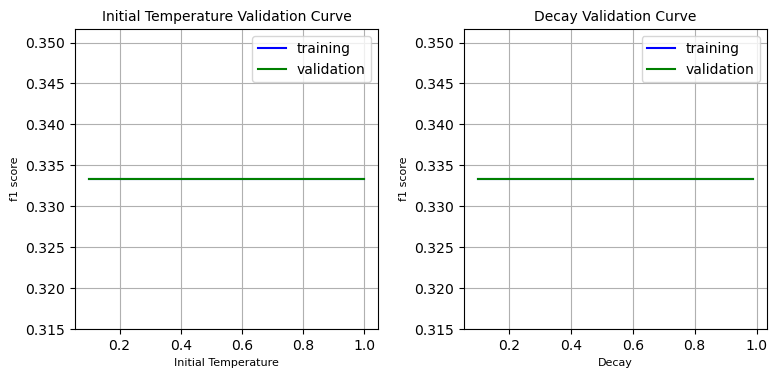

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

parameter_range1 = [.1, .25, .50, 1]
parameter_range2 = [.1, .25, .50, .99]

ax1.plot(parameter_range1, mean_init_temp_train_score,
         label="training", color='b')
ax1.plot(parameter_range1, mean_init_temp_test_score,
         label="validation", color='g')
ax1.set_title("Initial Temperature Validation Curve", fontsize=10)
ax1.set_xlabel("Initial Temperature", fontsize=8)
ax1.set_ylabel("f1 score", fontsize=8)
ax1.legend(loc='best')
ax1.grid()

ax2.plot(parameter_range2, mean_decay_train_score,
         label="training", color='b')
ax2.plot(parameter_range2, mean_decay_test_score,
         label="validation", color='g')
ax2.set_title("Decay Validation Curve", fontsize=10)
ax2.set_xlabel("Decay", fontsize=8)
ax2.set_ylabel("f1 score", fontsize=8)
ax2.legend(loc='best')
ax2.grid()

fig.tight_layout(pad = 1.5)
plt.savefig('plots/nn_sa_validation_curves.png')
plt.show()

### Genetic Algorithm

#### Prediction

In [184]:
# Neural Network - Genetic Algorithm
avg_ga_time = []
avg_ga_test_f1 = []
avg_ga_train_f1 = []
avg_ga_fitness = []
avg_train_sizes = []
avg_train_scores = []
avg_validation_scores = []

for seed in seeds:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
                                     algorithm = 'genetic_alg', max_iters = 2000,
                                     bias = True, is_classifier = True, learning_rate = 0.001,
                                     early_stopping = True, max_attempts = 10,
    				 random_state = seed, curve = True, pop_size = 850, mutation_prob=.1)

    # Get time
    start_time = time.time()
    nn_model1.fit(X_train, y_train)
    end_time = time.time()
    ga_time = end_time - start_time
    avg_ga_time.append(ga_time)

    # Predict labels for train set and assess f1
    y_train_pred = nn_model1.predict(X_train)
    y_train_f1 = f1_score(y_train, y_train_pred)
    print('Training f1: ', y_train_f1)
    avg_ga_train_f1.append(y_train_f1)

    # Predict labels for test set and assess f1
    y_test_pred = nn_model1.predict(X_test)
    y_test_f1 = f1_score(y_test, y_test_pred)
    print('Test f1: ', y_test_f1)
    avg_ga_test_f1.append(y_test_f1)

    # Get fitness
    fitness_curve_ga = nn_model1.fitness_curve
    avg_ga_fitness.append(fitness_curve_ga)

    # Get learning curve
    # train_sizes, train_scores, validation_scores = learning_curve(
    # estimator = nn_model1,
    # X = X_train,
    # y = y_train, cv = 5,
    # scoring = 'f1_macro',
    # random_state=seed,
    # n_jobs = -1)

    # avg_train_sizes.append(train_sizes)
    # avg_train_scores.append(train_scores)
    # avg_validation_scores.append(validation_scores)

Training f1:  0.9587628865979382
Test f1:  0.8888888888888888
Training f1:  0.9513513513513514
Test f1:  0.9024390243902439
Training f1:  0.9451327433628318
Test f1:  0.8409090909090909
Training f1:  0.9541595925297114
Test f1:  0.8571428571428571
Training f1:  0.9703315881326352
Test f1:  0.9156626506024096


In [185]:
# Run time
avg_ga_time = np.mean(avg_ga_time)
print('Avg Run Time: ', avg_ga_time)

# Training performance
avg_ga_train_f1 = np.mean(avg_ga_train_f1)
print('Avg Training Performance: ', avg_ga_train_f1)

# Testing performance
avg_ga_test_f1 = np.mean(avg_ga_test_f1)
print('Avg Test Performance: ', avg_ga_test_f1)

Avg Run Time:  106.19401335716248
Avg Training Performance:  0.9559476323948936
Avg Test Performance:  0.881008502386698


In [ ]:
# Pop Size: 850, Mutation Prob: .1
# Avg Run Time:  41.921142721176146
# Avg Training Performance:  0.9559476323948936
# Avg Test Performance:  0.881008502386698

#### Fitness Curve

In [216]:
print(avg_ga_fitness[4][:,0])

[3.47789638 3.47789638 3.03525502 2.7823171  2.46614471 2.46614471
 2.46614471 2.46614471 2.46614471 2.46614471 2.46614471 2.46614471
 2.46614471 2.33967575 2.33967575 1.77056543 1.77056543 1.77056543
 1.77056543 1.77056543 1.77056543 1.77056543 1.07498615 1.07498615
 1.07498615 1.07498615 1.07498615 1.07498615 1.07498615 1.07498615
 1.07498615 1.07498615 1.07498615]


In [217]:
# Fitness Curve
# avg_ga_fitness1 = np.mean(avg_ga_fitness[0], axis=1)
print('Avg Fitness Curve: ', avg_ga_fitness[4][:,0])

Avg Fitness Curve:  [3.47789638 3.47789638 3.03525502 2.7823171  2.46614471 2.46614471
 2.46614471 2.46614471 2.46614471 2.46614471 2.46614471 2.46614471
 2.46614471 2.33967575 2.33967575 1.77056543 1.77056543 1.77056543
 1.77056543 1.77056543 1.77056543 1.77056543 1.07498615 1.07498615
 1.07498615 1.07498615 1.07498615 1.07498615 1.07498615 1.07498615
 1.07498615 1.07498615 1.07498615]


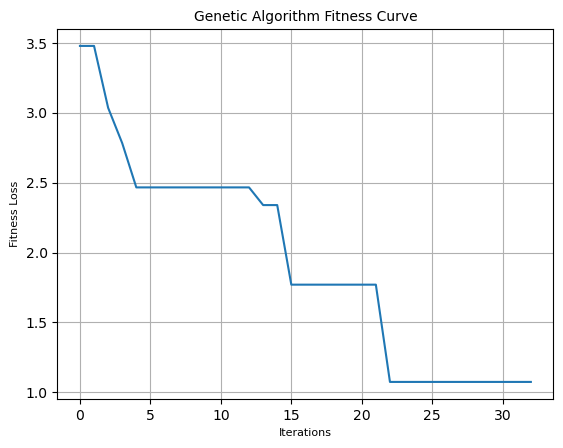

In [221]:
# Plotting fitness curve
iterations = [*range(0, len(avg_ga_fitness[4][:,0]))]
plt.plot(iterations, avg_ga_fitness[4][:,0])
plt.title('Genetic Algorithm Fitness Curve', fontsize=10)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Fitness Loss', fontsize=8)
plt.grid()
plt.savefig('plots/nn_ga_fitness_iterations.png')
plt.show()

#### Learning Curve

In [99]:
# avg_train_sizes = np.mean(avg_train_sizes, axis=0)
# avg_train_scores = np.mean(np.mean(avg_train_scores, axis=0), axis=1)
# avg_validation_scores = np.mean(np.mean(avg_validation_scores, axis=0), axis=1)

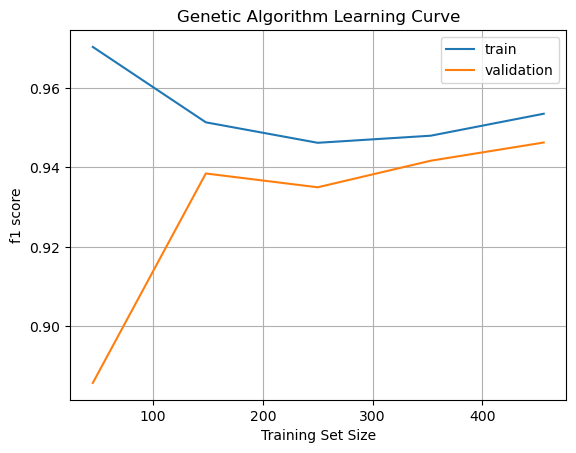

In [100]:
# plt.plot(avg_train_sizes, avg_train_scores, label="train")
# plt.plot(avg_train_sizes, avg_validation_scores, label="validation")

# plt.title("Genetic Algorithm Learning Curve")
# plt.xlabel("Training Set Size")
# plt.ylabel("f1 score")
# plt.legend(loc="best")
# plt.grid()
# plt.savefig('plots/nn_ga_learning_curve.png')
# plt.show()

#### Validation Curves

In [77]:
# parameter_range = [10, 50, 100, 150, 200, 500, 1000]

# nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
#                                  algorithm = 'genetic_alg', max_iters = 2000,
#                                  bias = True, is_classifier = True, learning_rate = 0.001,
#                                  early_stopping = True, max_attempts = 10,
# 				 random_state = seed, curve = True)
# pop_size_train_score, pop_size_test_score = validation_curve(nn_model1, X_train, y_train,
#                                            param_name="pop_size",
#                                            param_range=parameter_range,
#                                            cv=5, scoring="f1_macro",
#                                           n_jobs=-1)

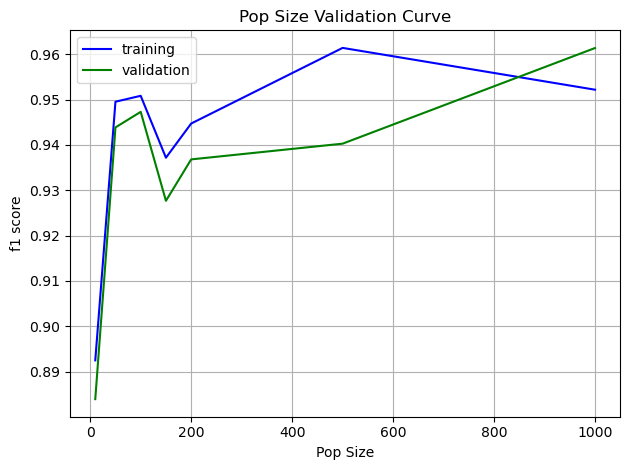

In [78]:
# # Calculating mean and standard deviation of training score
# mean_pop_size_train_score = np.mean(pop_size_train_score, axis=1)
 
# # Calculating mean and standard deviation of testing score
# mean_pop_size_test_score = np.mean(pop_size_test_score, axis=1)

# parameter_range = [10, 50, 100, 150, 200, 500, 1000]
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range, mean_pop_size_train_score,
#          label="training", color='b')
# plt.plot(parameter_range, mean_pop_size_test_score,
#          label="validation", color='g')
 
# # Creating the plot
# plt.title("Pop Size Validation Curve")
# plt.xlabel("Pop Size")
# plt.ylabel("f1 score")
# plt.tight_layout()
# plt.legend(loc='best')
# plt.grid()
# plt.savefig('plots/nn_ga_pop_size_validation_curve.png')
# plt.show()

In [79]:
# parameter_range = [.1, .25, .5, .75, .99]

# nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
#                                  algorithm = 'genetic_alg', max_iters = 2000,
#                                  bias = True, is_classifier = True, learning_rate = 0.001,
#                                  early_stopping = True, max_attempts = 10,
# 				 random_state = RANDOM_STATE, curve = True)
# mut_prob_train_score, mut_prob_test_score = validation_curve(nn_model1, X_train, y_train,
#                                            param_name="mutation_prob",
#                                            param_range=parameter_range,
#                                            cv=5, scoring="f1_macro",
#                                           n_jobs=-1)

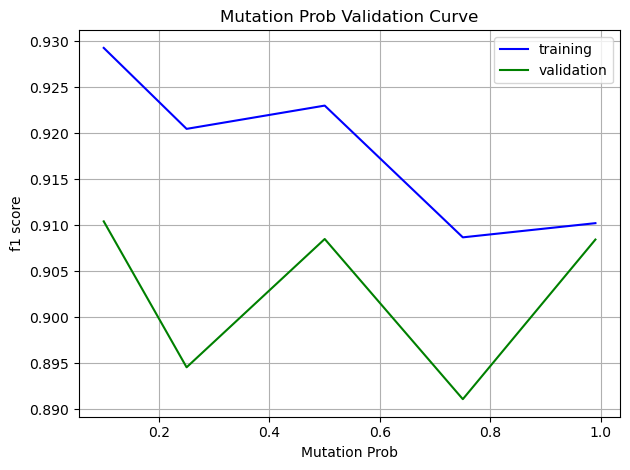

In [80]:
# # Calculating mean and standard deviation of training score
# mean_mut_prob_train_score = np.mean(mut_prob_train_score, axis=1)
 
# # Calculating mean and standard deviation of testing score
# mean_mut_prob_test_score = np.mean(mut_prob_test_score, axis=1)

# parameter_range = [.1, .25, .5, .75, .99]
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range, mean_mut_prob_train_score,
#          label="training", color='b')
# plt.plot(parameter_range, mean_mut_prob_test_score,
#          label="validation", color='g')
 
# # Creating the plot
# plt.title("Mutation Prob Validation Curve")
# plt.xlabel("Mutation Prob")
# plt.ylabel("f1 score")
# plt.tight_layout()
# plt.legend(loc='best')
# plt.grid()
# plt.show()

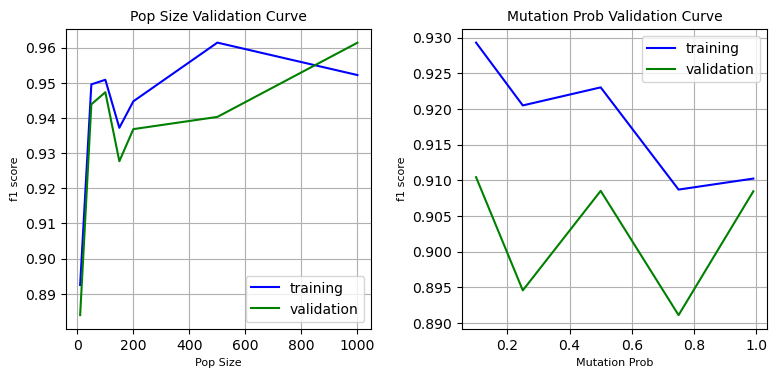

In [84]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

# parameter_range1 = [10, 50, 100, 150, 200, 500, 1000]
# parameter_range2 = [.1, .25, .5, .75, .99]

# ax1.plot(parameter_range1, mean_pop_size_train_score,
#          label="training", color='b')
# ax1.plot(parameter_range1, mean_pop_size_test_score,
#          label="validation", color='g')
# ax1.set_title("Pop Size Validation Curve", fontsize=10)
# ax1.set_xlabel("Pop Size", fontsize=8)
# ax1.set_ylabel("f1 score", fontsize=8)
# ax1.legend(loc='best')
# ax1.grid()

# ax2.plot(parameter_range2, mean_mut_prob_train_score,
#          label="training", color='b')
# ax2.plot(parameter_range2, mean_mut_prob_test_score,
#          label="validation", color='g')
# ax2.set_title("Mutation Prob Validation Curve", fontsize=10)
# ax2.set_xlabel("Mutation Prob", fontsize=8)
# ax2.set_ylabel("f1 score", fontsize=8)
# ax2.legend(loc='best')
# ax2.grid()

# fig.tight_layout(pad = 1.5)
# plt.savefig('plots/nn_ga_validation_curves.png')
# plt.show()

In [87]:
# parameter_range = [.1, .25, .5, .75, .99]

# nn_model1 = mlrose.NeuralNetwork(hidden_nodes = (75,), activation = 'relu',
#                                  algorithm = 'genetic_alg', max_iters = 2000,
#                                  bias = True, is_classifier = True, learning_rate = 0.001,
#                                  early_stopping = True, max_attempts = 10,
# 				 random_state = RANDOM_STATE, curve = True, pop_size=850)
# mut_prob_train_score, mut_prob_test_score = validation_curve(nn_model1, X_train, y_train,
#                                            param_name="mutation_prob",
#                                            param_range=parameter_range,
#                                            cv=5, scoring="f1_macro",
#                                           n_jobs=-1)

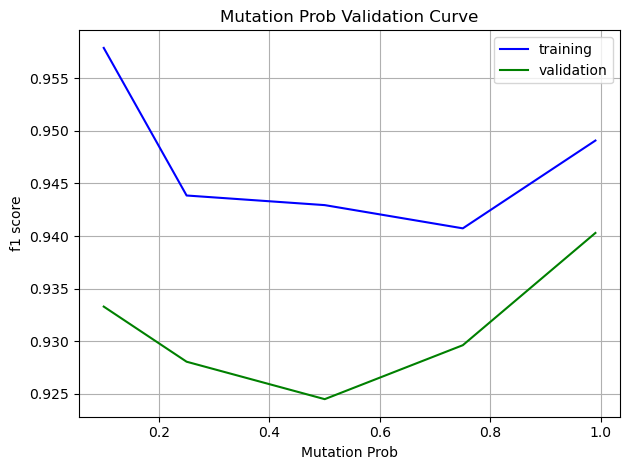

In [88]:
# # Calculating mean and standard deviation of training score
# mean_mut_prob_train_score = np.mean(mut_prob_train_score, axis=1)
 
# # Calculating mean and standard deviation of testing score
# mean_mut_prob_test_score = np.mean(mut_prob_test_score, axis=1)

# parameter_range = [.1, .25, .5, .75, .99]
# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range, mean_mut_prob_train_score,
#          label="training", color='b')
# plt.plot(parameter_range, mean_mut_prob_test_score,
#          label="validation", color='g')
 
# # Creating the plot
# plt.title("Mutation Prob Validation Curve")
# plt.xlabel("Mutation Prob")
# plt.ylabel("f1 score")
# plt.tight_layout()
# plt.legend(loc='best')
# plt.grid()
# plt.show()

### Combined Plots

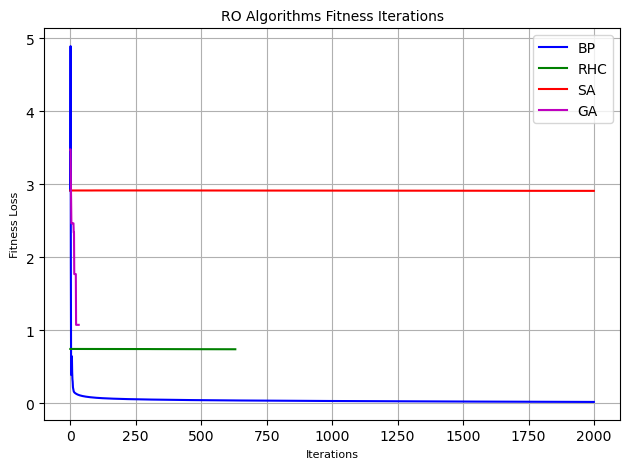

In [220]:
iterations1 = [*range(0, len(avg_bp_fitness))]
iterations2 = [*range(0, len(avg_rhc_fitness[0][:,0]))]
iterations3 = [*range(0, len(avg_sa_fitness[:,0]))]
iterations4 = [*range(0, len(avg_ga_fitness[4][:,0]))]

plt.plot(iterations1, avg_bp_fitness,
         label="BP", color='b')
plt.plot(iterations2, avg_rhc_fitness[0][:,0],
         label="RHC", color='g')
plt.plot(iterations3, avg_sa_fitness[:,0],
         label="SA", color='r')
plt.plot(iterations4, avg_ga_fitness[4][:,0],
         label="GA", color='m')
plt.title("RO Algorithms Fitness Iterations", fontsize=10)
plt.xlabel("Iterations", fontsize=8)
plt.ylabel("Fitness Loss", fontsize=8)
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.savefig('plots/combined_fitness_iterations.png')
plt.show()

In [155]:
print(avg_rhc_fitness)

[array([[7.44678996e-01, 1.03634000e+05],
       [7.44678996e-01, 1.03635000e+05],
       [7.44678996e-01, 1.03636000e+05],
       ...,
       [7.40566012e-01, 1.04546000e+05],
       [7.40566012e-01, 1.04547000e+05],
       [7.40566012e-01, 1.04548000e+05]]), array([[7.25634259e-01, 9.21910000e+04],
       [7.25634259e-01, 9.21920000e+04],
       [7.25634259e-01, 9.21930000e+04],
       ...,
       [7.08972312e-01, 9.50570000e+04],
       [7.08972312e-01, 9.50580000e+04],
       [7.08972312e-01, 9.50590000e+04]]), array([[3.45285649e-01, 9.48370000e+04],
       [3.45260560e-01, 9.48390000e+04],
       [3.45260560e-01, 9.48400000e+04],
       [3.45260560e-01, 9.48410000e+04],
       [3.45259794e-01, 9.48430000e+04],
       [3.45259794e-01, 9.48440000e+04],
       [3.45259793e-01, 9.48460000e+04],
       [3.45253165e-01, 9.48480000e+04],
       [3.45227091e-01, 9.48500000e+04],
       [3.45227091e-01, 9.48510000e+04],
       [3.45226579e-01, 9.48530000e+04],
       [3.45215365e-01, 9.48